In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import json, time, os, zipfile

**Dado em Análise:** 

https://www.kaggle.com/competitions/instacart-market-basket-analysis/data

In [6]:
if not os.path.isdir('./data'):
    os.mkdir('./data')

if os.path.isfile('./data/order_products.zip'):
    with zipfile.ZipFile('./data/order_products.zip', 'r') as zip_ref:
        zip_ref.extractall('./data')

In [2]:
orders = {}
with open('./data/order_products.csv', 'r') as file:
    next(file)
    for line in file:
        order_id, product_id, _, _ = line.strip().split(',')

        if order_id not in orders.keys():
            orders[order_id] = [product_id]
        else:
            orders[order_id].append(product_id)
orders = orders.values()

In [3]:
n_products = [ len(order) for order in orders ]
pd.Series(n_products).describe().round(2)

count    3214874.00
mean          10.09
std            7.53
min            1.00
25%            5.00
50%            8.00
75%           14.00
max          145.00
dtype: float64

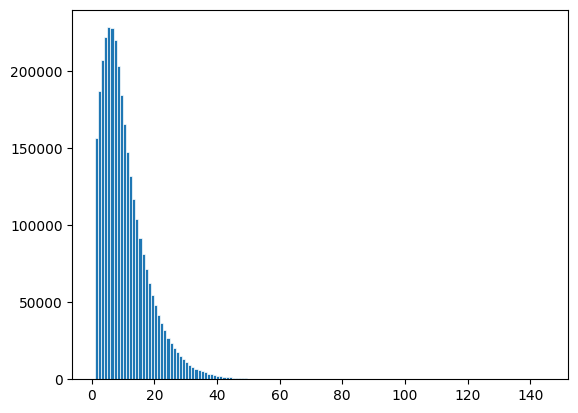

In [4]:
plt.hist(n_products, bins=np.max(n_products), edgecolor='white', linewidth=0.5)
plt.show()

In [5]:
filtred_orders = [order for order in orders if len(order) <= 40]

In [6]:
n__filtred_products = [ len(order) for order in filtred_orders ]
pd.Series(n__filtred_products).describe().round(2)

count    3201186.00
mean           9.93
std            7.11
min            1.00
25%            5.00
50%            8.00
75%           14.00
max           40.00
dtype: float64

In [7]:
filtred_orders = [order for order in orders if len(order) > 3 and len(order) <= 40]

In [8]:
n__filtred_products = [ len(order) for order in filtred_orders ]
pd.Series(n__filtred_products).describe().round(2)

count    2650418.00
mean          11.56
std            6.75
min            4.00
25%            6.00
50%           10.00
75%           15.00
max           40.00
dtype: float64

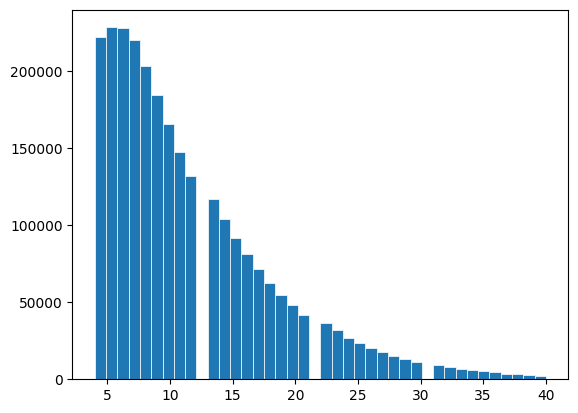

In [9]:
plt.hist(n__filtred_products, bins=np.max(n__filtred_products), edgecolor='white', linewidth=0.5)
plt.show()

In [10]:
edges = {}
if not os.path.isfile('./data/edges.json'):
    t = time.time()
    for i, order in enumerate(filtred_orders):
        for productA in order:
            for productB in order:
                if productA != productB: 
                    A, B = sorted([productA, productB])
                    edge = f'{A},{B}'
                    if edge in edges.keys(): edges[edge] += 1
                    else: edges[edge] = 1 
        
        if t-time.time() > 10:
            t = time.time()
            print(i/len(filtred_orders)*100, '%')

    json.dump(edges, open('./data/edges.json', 'w'), indent=2)
else:
    edges = json.load(open('./data/edges.json', 'r'))


In [11]:
pd.Series(edges.values()).describe().round(2)

count    38742669.00
mean           11.47
std           132.03
min             2.00
25%             2.00
50%             2.00
75%             6.00
max        120698.00
dtype: float64

In [13]:
threshold = 143

with open('./data/edges.csv', 'w') as file:
    for edge, value in edges.items():
        if value > threshold:
            file.write(f'{edge},{value}\n')